In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt

import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [4]:
data = pd.read_csv("C:\\Users\\SURABHI\\Downloads\\walmart-1\\Walmart DataSet\\Walmart DataSet.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [15]:
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [17]:
data['Year'] = pd.DatetimeIndex(data['Date']).year

In [19]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Month         6435 non-null   int32  
 9   Year          6435 non-null   int32  
dtypes: float64(5), int32(2), int64(2), object(1)
memory usage: 452.6+ KB


In [23]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [27]:
X = data[['Month','Year','Fuel_Price']]
Y = data['Weekly_Sales']

In [29]:
X

,Month,Year,Fuel_Price
0,5,2010,2.572
1,12,2010,2.548
2,2,2010,2.514
3,2,2010,2.561
4,5,2010,2.625
...,...,...,...
6430,9,2012,3.997
6431,5,2012,3.985
6432,12,2012,4.000
6433,10,2012,3.969


In [31]:
Y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size =0.8, test_size = 0.2, random_state=0)

y_test = np.array(y_test)

In [35]:
X_train.shape ,X_test.shape,y_train.shape,y_test.shape

((5148, 3), (1287, 3), (5148,), (1287,))

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [39]:
print('Linear Regression Algorithm Training accuracy of the model :', lin_model.score(X_train, y_train))

Linear Regression Algorithm Training accuracy of the model : 0.007644344245419599


In [41]:
lin_preds = lin_model.predict(X_test)

In [43]:
lin_preds

array([1124412.38943674, 1040606.73493558, 1099948.4606735 , ...,
       1036036.9833013 , 1093693.65915714, 1083772.9080191 ])

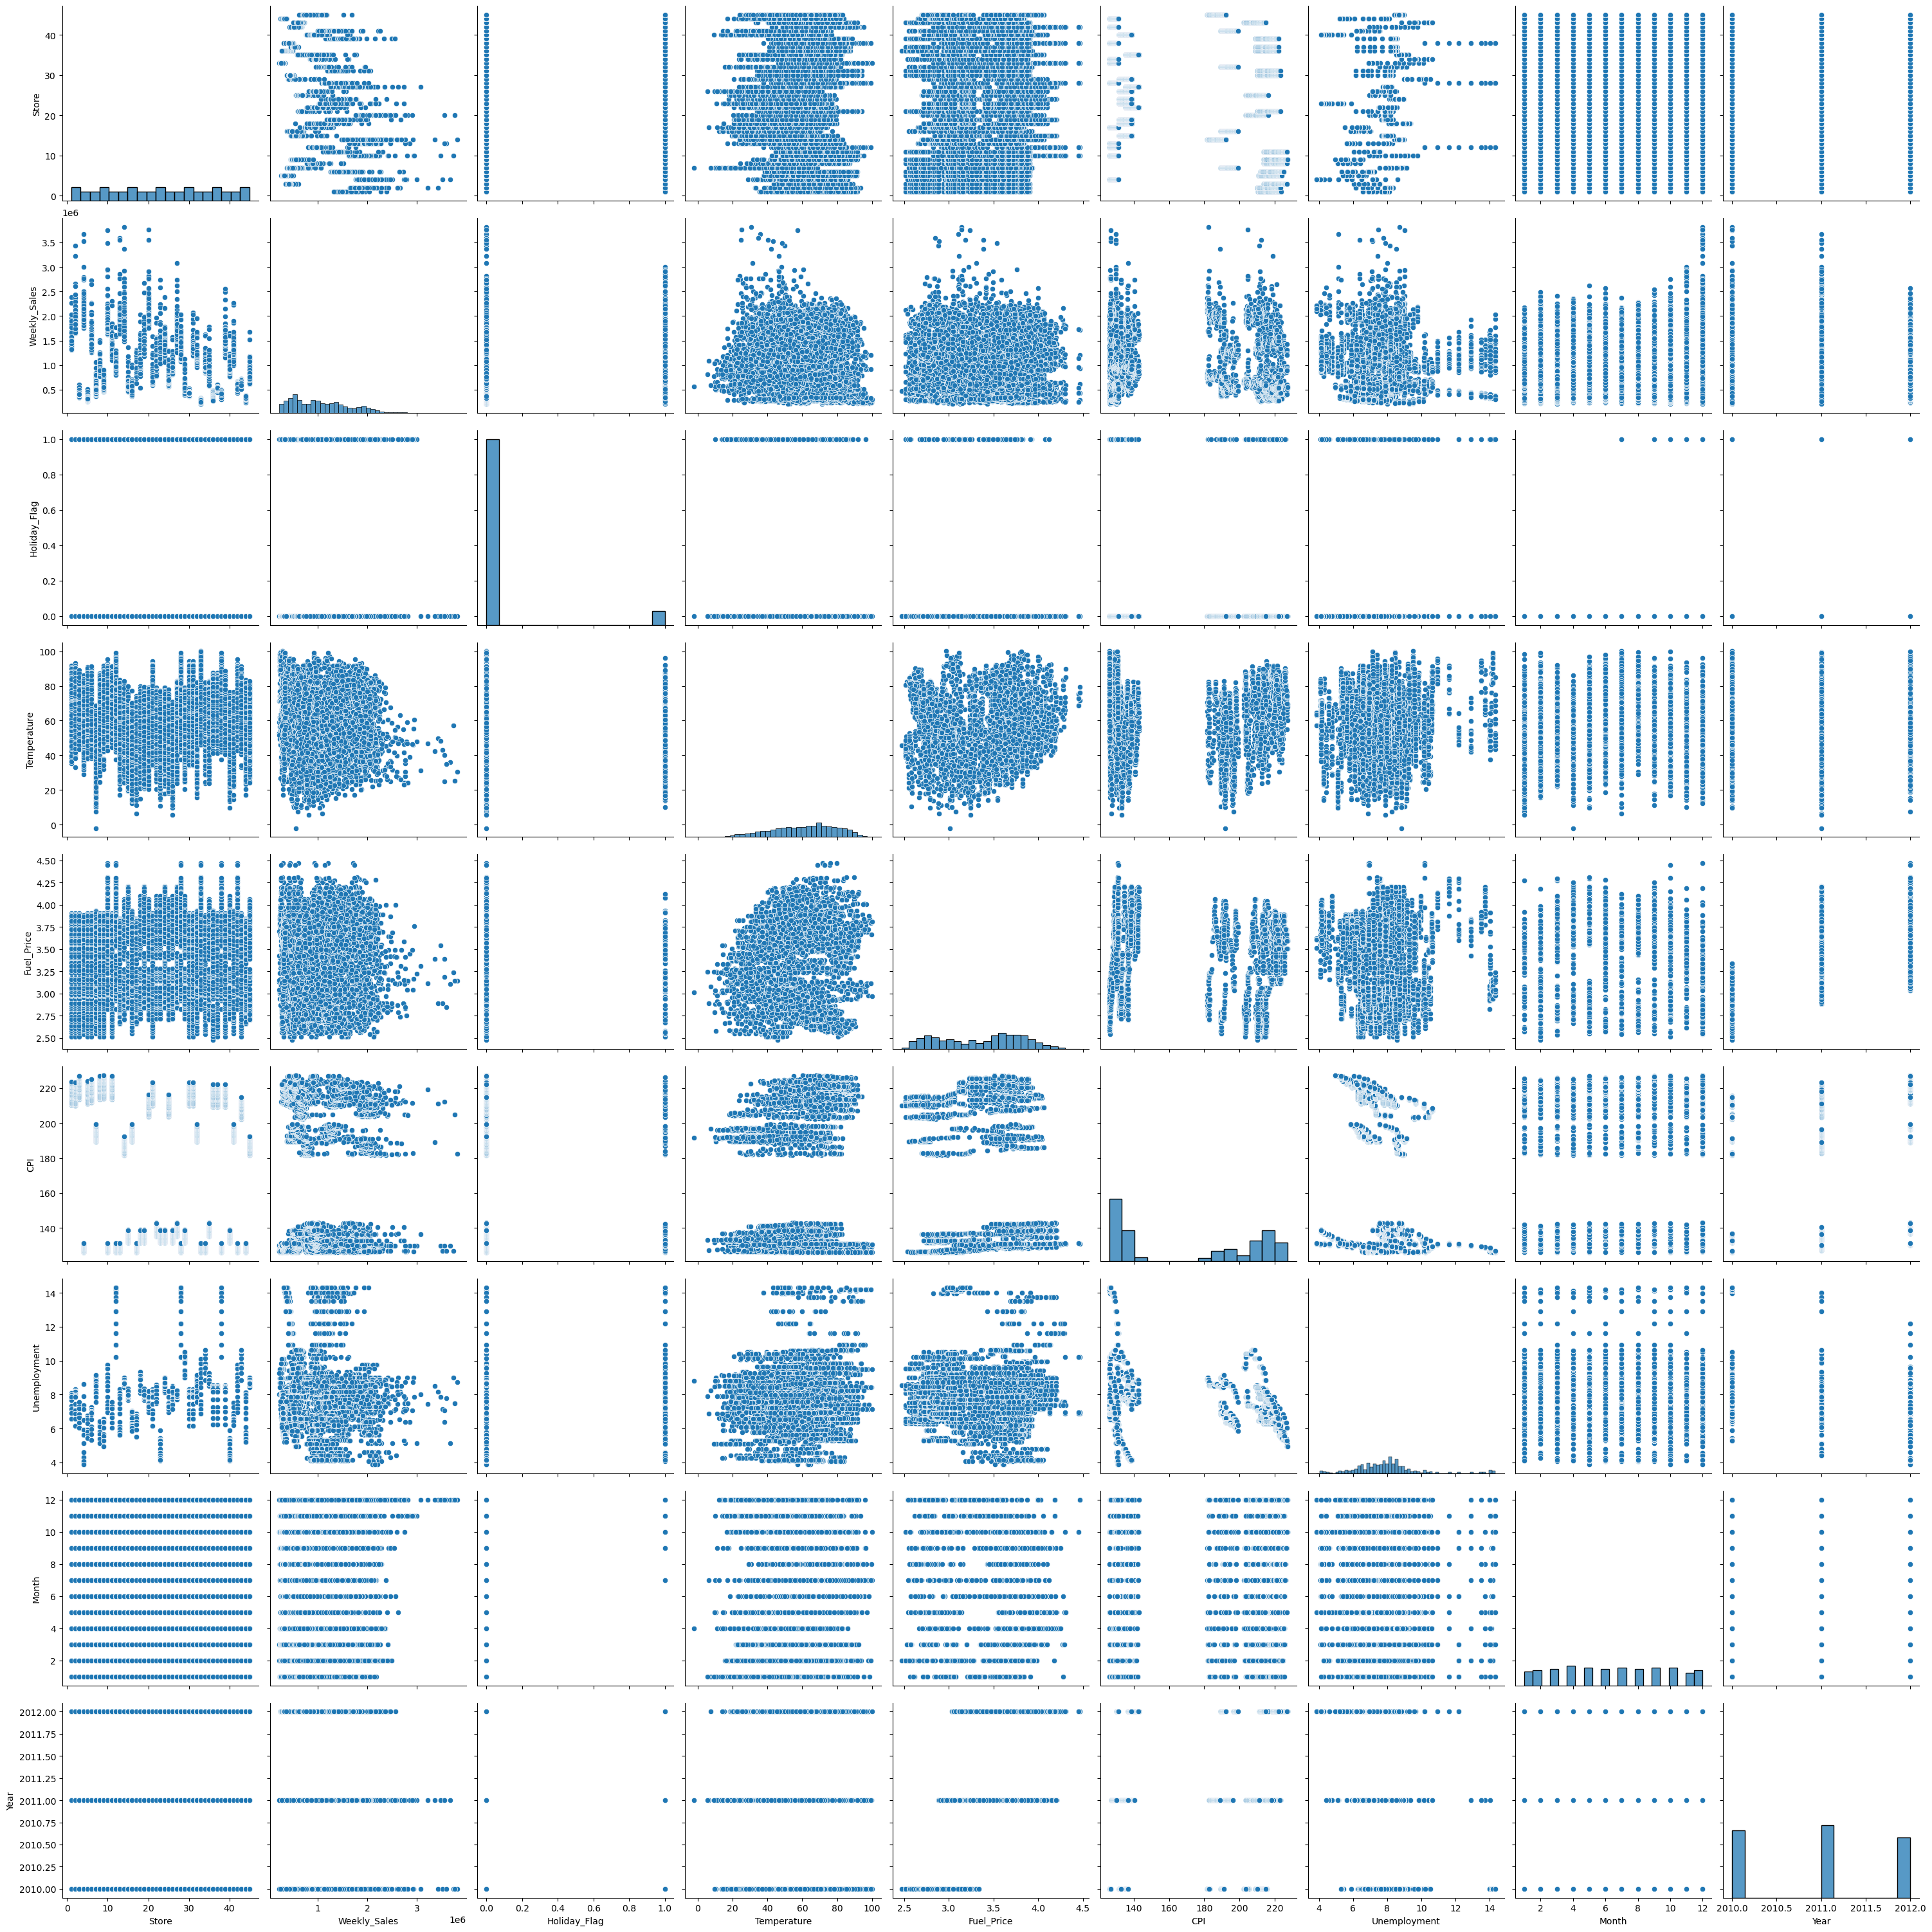

In [45]:
sns.pairplot(data, height = 3.4)
plt.show()

In [46]:
print('MAE of the Linear Regression Algorithm:')
print(mean_absolute_error(y_test, lin_preds))

MAE of the Linear Regression Algorithm:
465143.8651662352


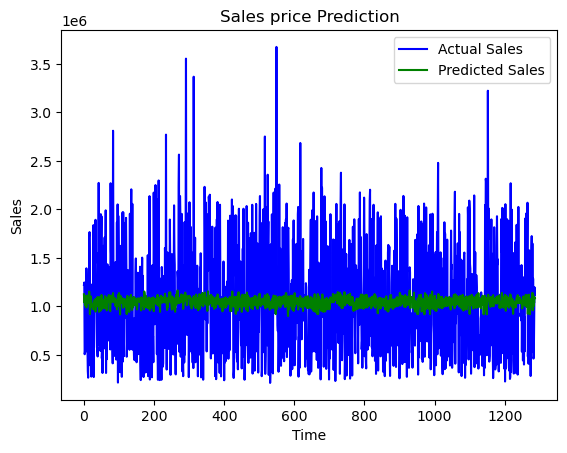

In [47]:
plt.plot(y_test, color = 'blue', label = 'Actual Sales')
plt.plot(lin_preds , color = 'green',label ='Predicted Sales')
plt.title('Sales price Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [48]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': lin_preds})
comparison

,Actual,Predicted
0,1220984.94,1.124412e+06
1,1246322.44,1.040607e+06
2,505918.21,1.099948e+06
3,527572.25,1.010806e+06
4,719235.07,1.108698e+06
...,...,...
1282,460945.14,9.979540e+05
1283,484263.25,1.068861e+06
1284,833429.22,1.036037e+06
1285,1197019.39,1.093694e+06


In [49]:
lin_preds

array([1124412.38943674, 1040606.73493558, 1099948.4606735 , ...,
       1036036.9833013 , 1093693.65915714, 1083772.9080191 ])

In [50]:
import pickle

#Save the trained model as a pickle string.
saved_model = pickle.dumps(lin_model)

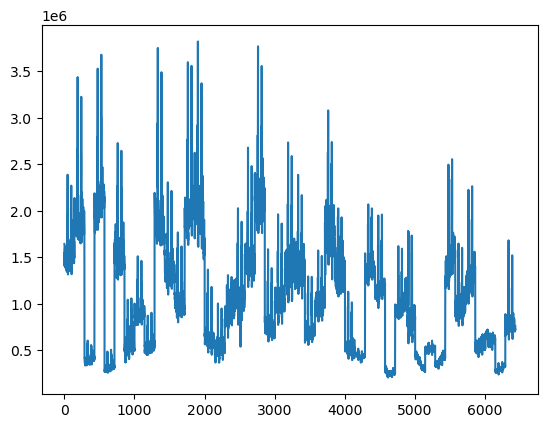

In [51]:
data['Weekly_Sales'].plot()
plt.show()

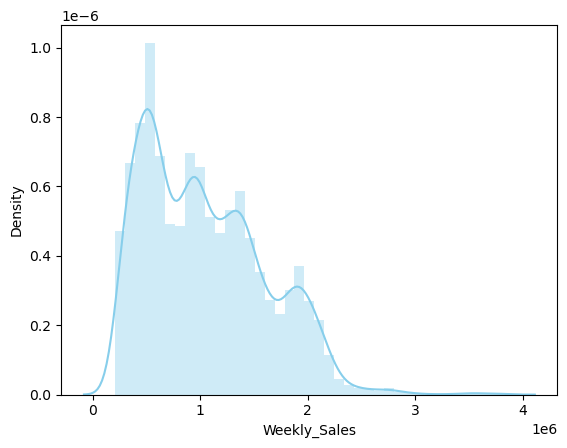

In [52]:
sns.distplot(data['Weekly_Sales'], color='skyblue')
plt.show()

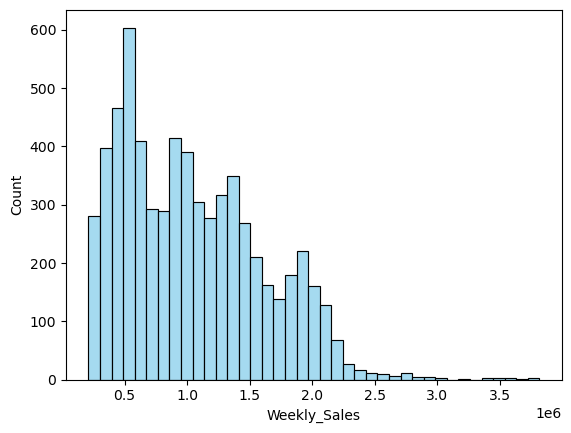

In [53]:
sns.histplot(data=data["Weekly_Sales"] , color="skyblue", label="Increasing of Sales Price (High)")
plt.show()

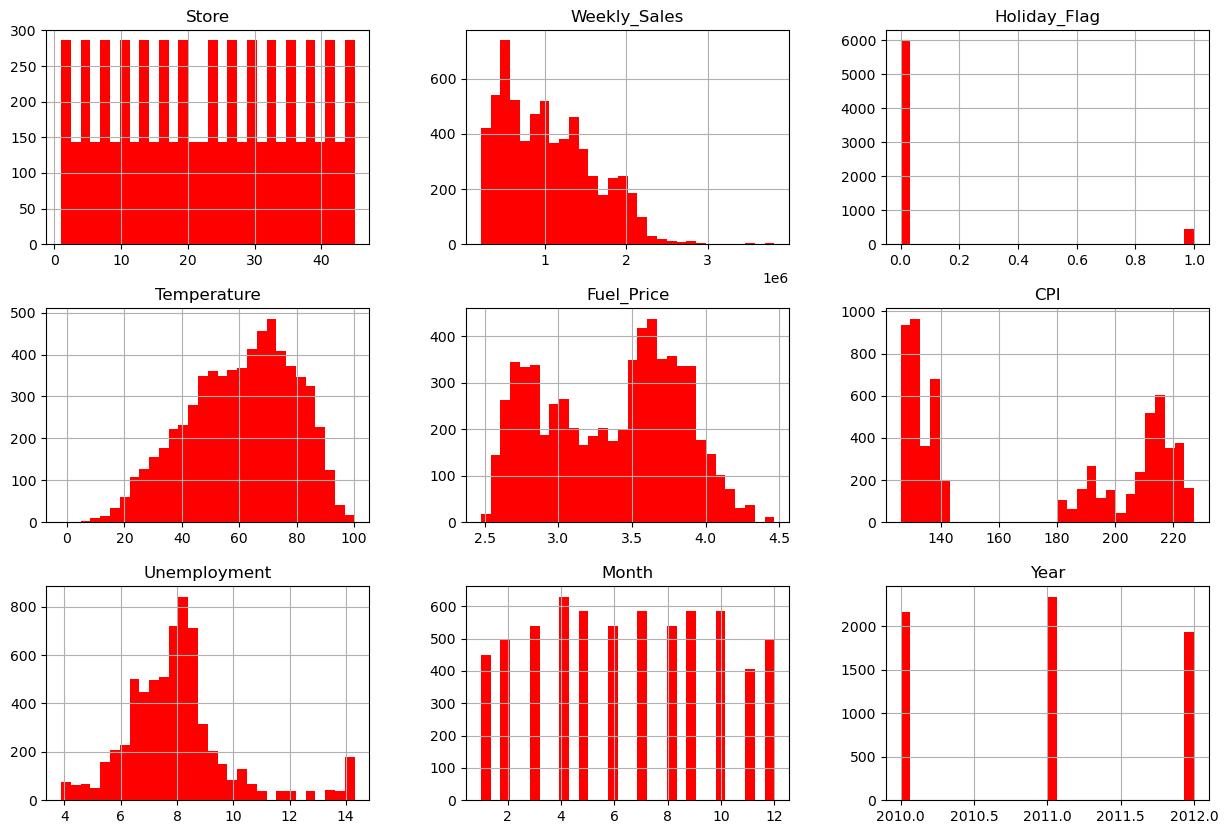

In [54]:
data.hist(color = "r",
        bins = 30,
        figsize = (15, 10))
plt.show()

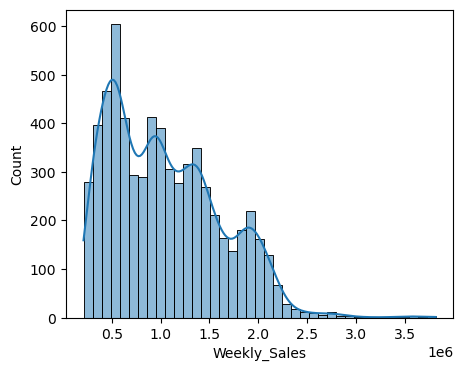

In [55]:
plt.figure(figsize = (5, 4))
sns.histplot(data = data, x = "Weekly_Sales", kde = True)
plt.show()

In [56]:
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

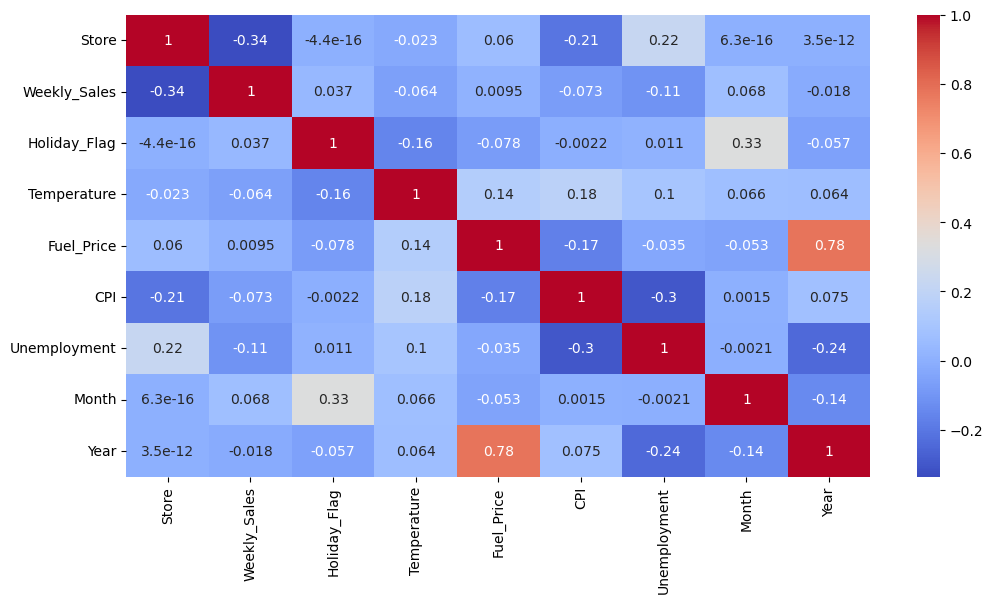

In [57]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

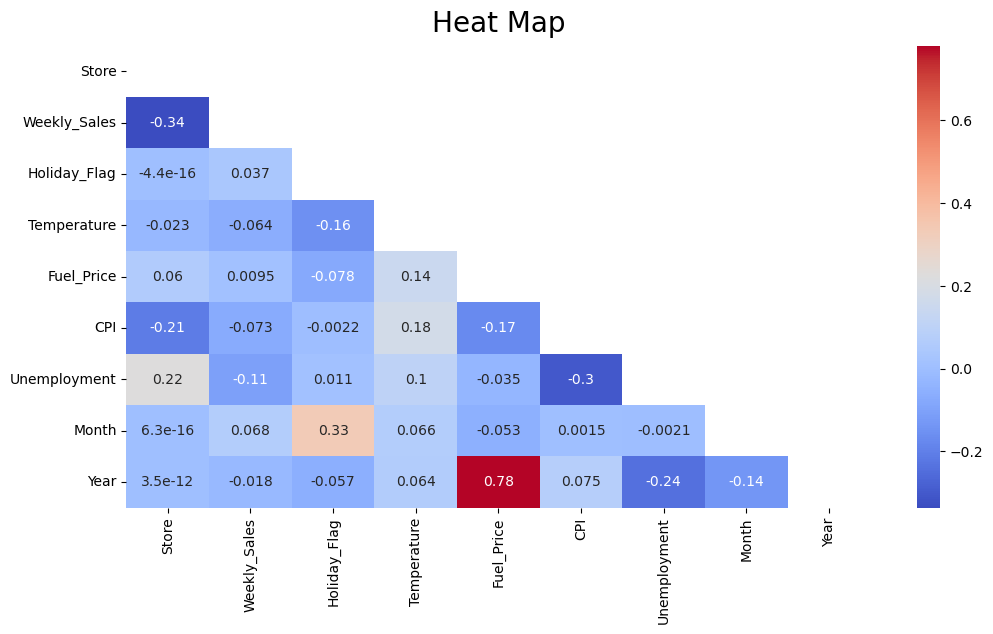

In [58]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) 
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, mask=mask)
heatmap.set_title("Heat Map", fontsize=20, pad=10)
plt.show()

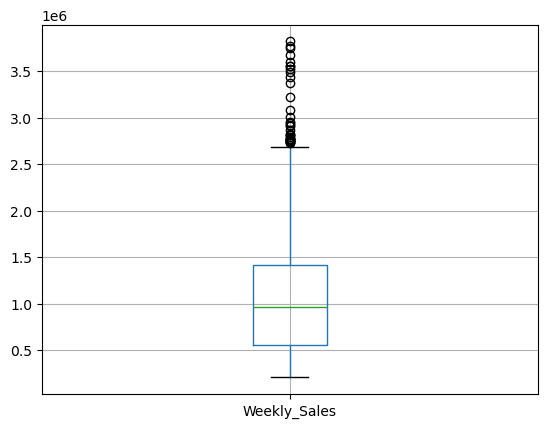

In [59]:
data.boxplot(column = "Weekly_Sales")
plt.show()

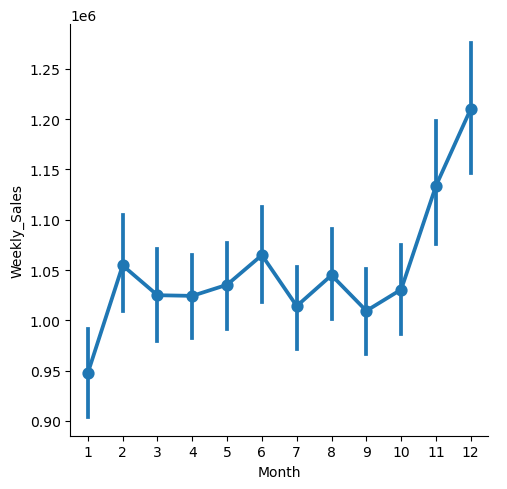

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Change kind to "point" for a Point plot
sns.catplot(data=data, x="Month", y="Weekly_Sales", kind="point") # per store type in cols
plt.show()

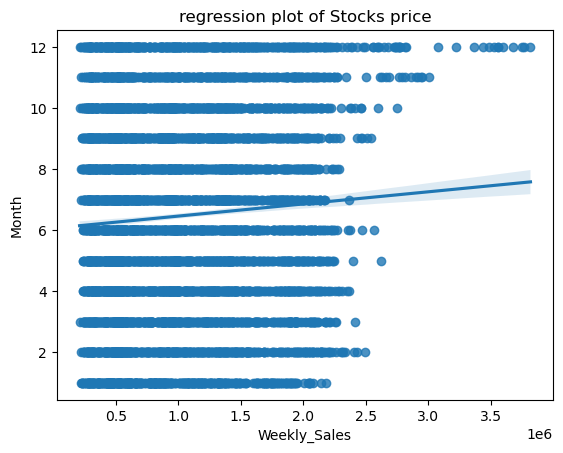

In [61]:
sns.regplot(data = data, x = 'Weekly_Sales',y = 'Month', logistic = False)
plt.title("regression plot of Stocks price")
plt.show()

<h2>forecasting sales of each store for next 12 weeks</h2>

In [63]:
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

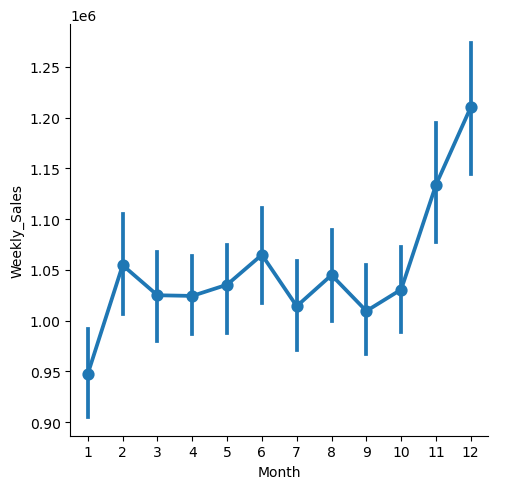

In [64]:
sns.catplot(data=data, x="Month", y="Weekly_Sales", kind="point") # per store type in cols
plt.show()

In [72]:
unique_dates = data['Date'].unique()
print(unique_dates[:10])  # Display the first 10 unique dates

# Convert the Date column to datetime, considering mixed formats and day-first format
data['Date'] = pd.to_datetime(data['Date'], format='mixed', dayfirst=True, errors='coerce')

# Check the conversion result
print(data['Date'].head())

['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010']
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]


In [75]:
data.set_index('Date', inplace = True)

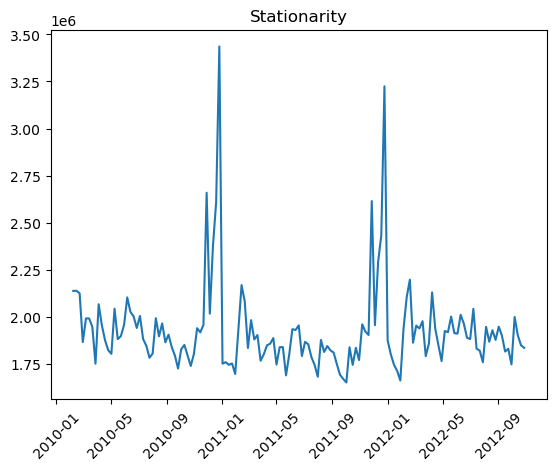

In [76]:
data['Weekly_Sales'] = data['Weekly_Sales'] * 1.0
# Assigning one store from each category
sales_a = data[data.Store == 2]['Weekly_Sales']
# Trend
sample = sales_a.resample('W').sum()
plt.plot(sample)
plt.title("Stationarity")
plt.xticks(rotation=45)
plt.show()

In [80]:
y= data['Weekly_Sales']

In [84]:
data.ndim

2

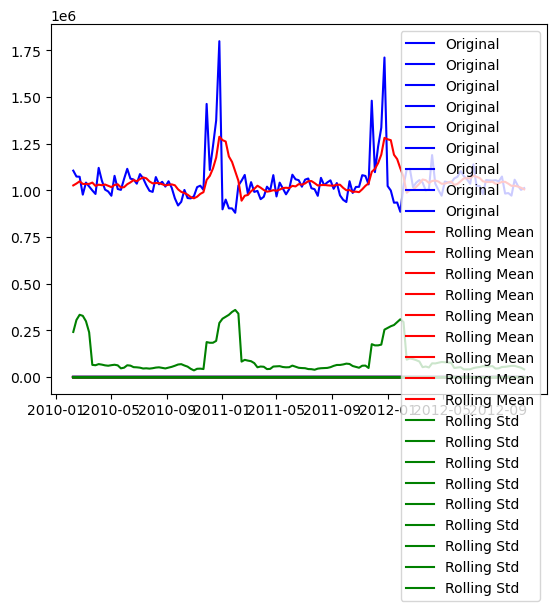

In [86]:
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
# Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
# Testing stationarity of store type a
test_stationarity(data)

In [88]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [89]:
best_aic = np.inf
best_order = None
best_seasonal_order = None

# Grid search
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)  # Set disp=False to suppress output
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # Save the best model
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal
        except Exception as e:
            print('An error occurred for ARIMA{}x{}12: {}'.format(param, param_seasonal, e))
            continue

print('Best ARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:198269.57354489036
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:193925.14445141162
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:180828.349143695
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:179942.29745178996
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:180736.8628656906
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:180233.90672537847
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:179969.07743502117
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:179929.34705497042
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:193976.04726809153
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:192594.05622862914
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:178996.5018724653
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:177826.42304356414
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:191789.67964490515
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:191688.0732902044
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:177963.85691897644
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:177820.8746369661
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:174429.30849131767
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:174108.2188558547

In [101]:
model_sarima = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1378      0.030      4.569      0.000       0.079       0.197
ma.L1         -0.5596      0.026    -21.557      0.000      -0.611      -0.509
ma.S.L12      -0.9101      0.006   -147.729      0.000      -0.922      -0.898
sigma2      6.075e+10    2.4e-13   2.53e+23      0.000    6.07e+10    6.07e+10


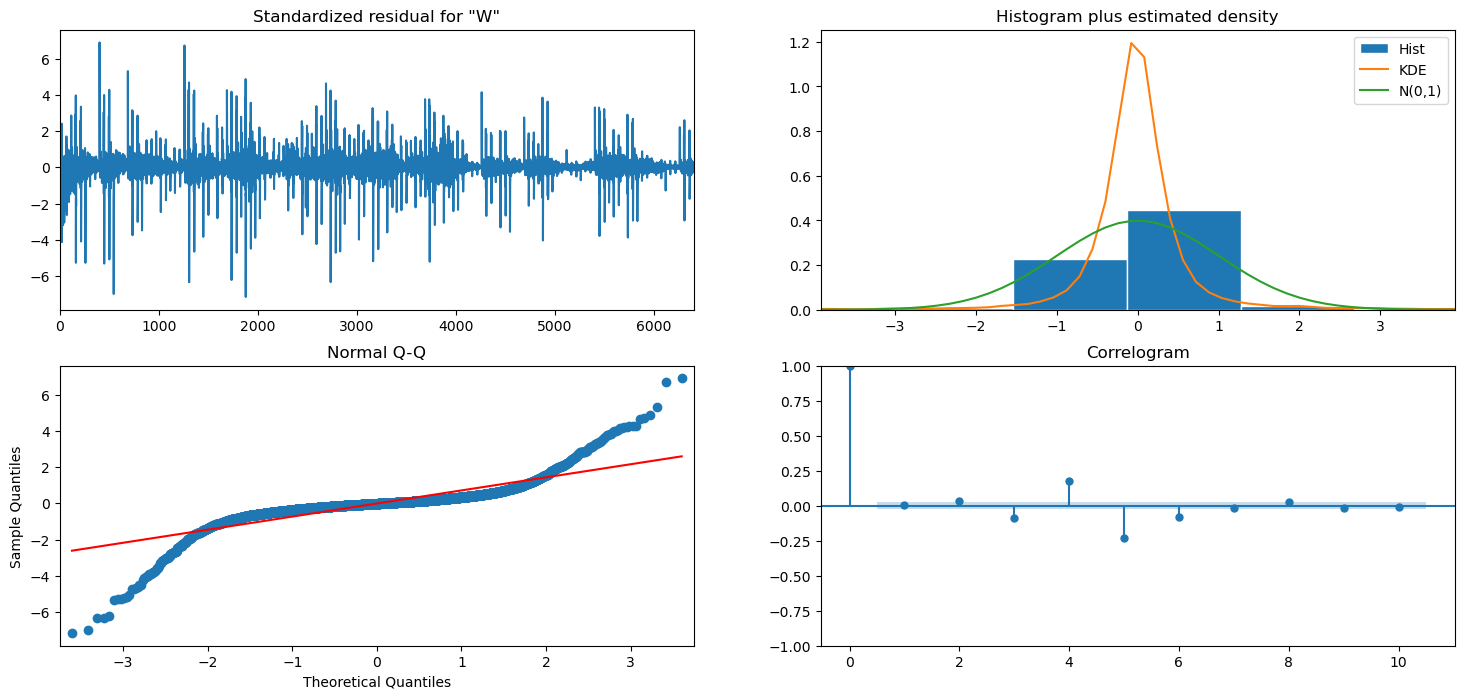

In [102]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

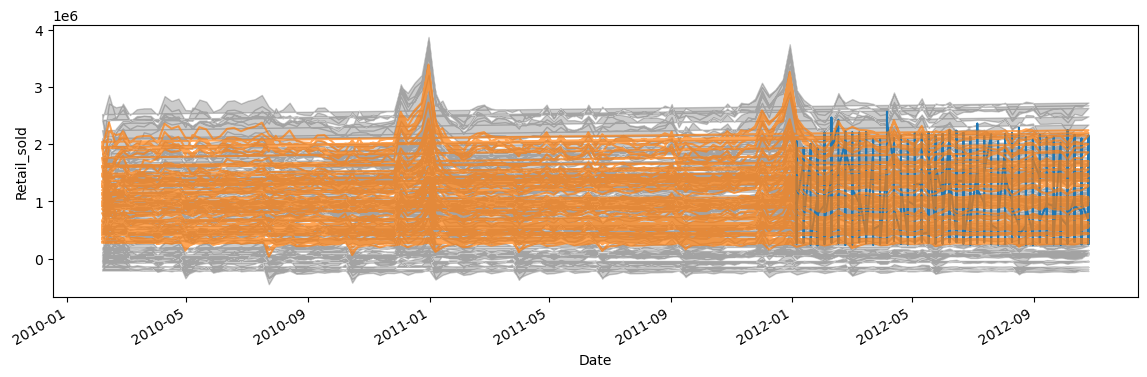

In [106]:
y = y.sort_index()

# Perform the plot
pred = results.get_prediction(start=pd.to_datetime('2012-10-19'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.show()

In [108]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-10-19':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 560788026105.78
The Root Mean Squared Error is 748857.81


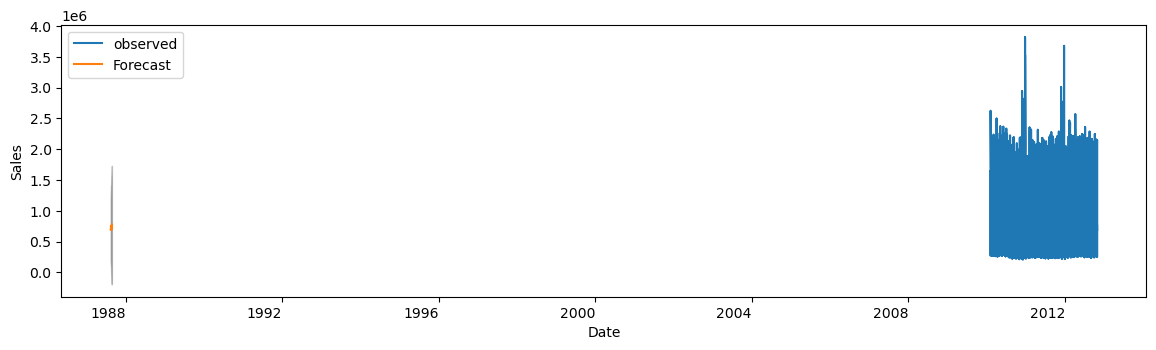

In [118]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()